## 作业：运用最近邻分类器对Fashion MNIST数据进行分类

   -  由于数据量大，我们仅对Fashion MNIST的测试集进行分类实验
   -  Fashion MNIST测试集： 数据包含十类，每类1000个样本，每个样本为28 * 28 的图像
   -  实验要求：对数据集划分训练集和验证集
   -  用训练集使用sklearn的KNeighborsClassifier训练的到分类器
   -  用得到的分类器对验证集的数据进行分类，得到准确率

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw):
    y = raw[:, 0]
    
    x = raw[:,1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, y

fashion_file = f"C:/Users/haitao/Desktop/fashion-mnist_test.csv"
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data)

# 显示两行图像，每行4幅
fig = plt.figure(figsize=(10, 10))
columns = 5
rows = 4
for i in range(1, columns*rows +1):
    im = np.array(x[10*i-1]*255,dtype=int)
    fig.add_subplot(rows, columns, i)
    plt.imshow(im,cmap='gray')
    plt.title(int(y[10*i-1]))
plt.show()

# 数据与标签 
Data = np.squeeze(x).reshape(10000,28*28)
label = y.astype(np.int_)
Data.shape, label.shape

FileNotFoundError: C:/Users/haitao/Desktop/fashion-mnist_test.csv not found.

In [76]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(Data, label, test_size=0.33)
knn = KNeighborsClassifier(n_neighbors=1, p=2, metric='minkowski')
classifier = knn.fit(X_train, y_train)
pred = knn.predict(X_test)
Acc = np.sum(pred == y_test)/y_test.size
print('The Accuracy of 1NN classifier on Iris dataset is: %0.2f %%' %(Acc*100))

The Accuracy of 1NN classifier on Iris dataset is: 80.70 %


C:\Users\haitao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3300 samples in 0.005s...
[t-SNE] Computed neighbors for 3300 samples in 0.352s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3300
[t-SNE] Computed conditional probabilities for sample 2000 / 3300
[t-SNE] Computed conditional probabilities for sample 3000 / 3300
[t-SNE] Computed conditional probabilities for sample 3300 / 3300
[t-SNE] Mean sigma: 1.991118


C:\Users\haitao\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


[t-SNE] KL divergence after 250 iterations with early exaggeration: 68.462173
[t-SNE] KL divergence after 1000 iterations: 1.122062


[Text(0.5, 1.0, 'FashionMNIST data T-SNE projection')]

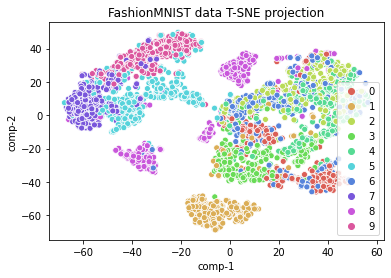

In [65]:
from sklearn.manifold import TSNE
import seaborn as sns
import pandas as pd
tsne = TSNE(n_components=2, verbose=1,  init='pca')
z = tsne.fit_transform(X_test)

df = pd.DataFrame()
df["y"] = y_test
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 10),
                data=df).set(title="FashionMNIST data T-SNE projection")